In [1]:
import nmslib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

In [2]:
np.random.seed(42)
n_cluster=100
n_estimation =100
X = np.random.randn(n_cluster*n_estimation, 2).astype(np.float32)

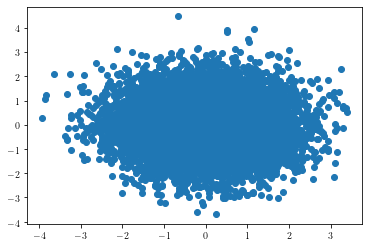

In [3]:
plt.scatter(X.T[0], X.T[1])
plt.show()

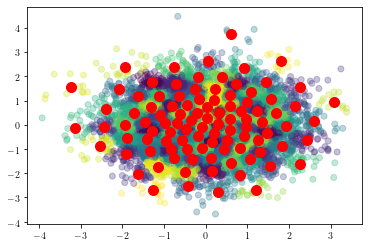

Attributed labels have the following counts: [171  62 163 105 119 148  67  89 109 195 106 106  56  56  85 187  32  29
 151 119  43 172 155 114 106  52  39  95  31 121  68  28 159 136  53 133
 110  99  33  31   7  42  83 144 142 122  46 178 115 100  89  91 197 206
  82 116  85 165 160  38 149  45  98  93  61  17  36  87 142 160  44  89
  69  91 197 174  98 117  55 117 131 174 199  21 167 115 108 149  74  13
  20 181  31  11 143  76 118  12 160  17]
Standard deviation in the number of points per cluster is: 53.22311527898381


In [4]:
km = KMeans(n_clusters=n_cluster)
labels = km.fit_predict(X)
cluster_centers = km.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c="red")
plt.show()
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print(f"Attributed labels have the following counts: {counts_elements}")
print(f"Standard deviation in the number of points per cluster is: {np.std(counts_elements)}")

In [5]:
# initialize a new index, using a HNSW index on L2
index = nmslib.init(space='l2')
index.addDataPointBatch(cluster_centers)
index.createIndex()

In [6]:
X_test = np.random.randn(100, 2).astype(np.float32)

In [11]:
# query for the nearest neighbours of the first datapoint
start = time.time()
ids, distances = index.knnQuery(X_test[0], k=10)
print(f"Predicting with nmslib took {time.time() - start}s")
distances

Predicting with nmslib took 0.0009980201721191406s


array([0.1370014 , 0.25452343, 0.38346314, 0.42569116, 0.4591695 ,
       0.49226567, 0.5258352 , 0.585576  , 0.64718187, 0.68947303],
      dtype=float32)

In [8]:
# get all nearest neighbours for all the datapoint
# using a pool of 4 threads to compute
start = time.time()
knn_result = index.knnQueryBatch(X_test, k=2, num_threads=4)
print(f"Predicting with nmslib took {time.time() - start}s")

Predicting with nmslib took 0.0049855709075927734s


In [9]:
start = time.time()
labels = km.predict(X_test)
print(f"Predicting with kmeans took {time.time() - start}s")

Predicting with kmeans took 0.009967803955078125s


In [10]:
idx, d = list(zip(*knn_result))